In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing Dataset

In [13]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Sakshi\Downloads\ecommerce_sales_new.csv")
df.head()


,OrderID,CustomerID,OrderDate,Product,Quantity,UnitPrice,PaymentMethod,City,State,Category,TotalAmount,DeliveryTime,CustomerRating
0,10001,5103,2023-02-17,Shoes,1,52796.66,Debit Card,Chennai,Tamil Nadu,Fashion,52796.66,3,3
1,10002,5436,2023-03-02,Laptop,1,48584.76,Net Banking,Bangalore,Karnataka,Electronics,48584.76,2,2
2,10003,5861,2023-12-03,Laptop,3,40726.00,Net Banking,Chennai,Tamil Nadu,Electronics,122178.00,7,1
3,10004,5271,2023-01-26,Headphones,4,37614.24,COD,Delhi,Delhi,Electronics,150456.96,9,4
4,10005,5107,2023-10-19,Jeans,3,19198.02,UPI,Hyderabad,Telangana,Fashion,57594.06,6,5


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderID         1200 non-null   int64  
 1   CustomerID      1200 non-null   int64  
 2   OrderDate       1200 non-null   object 
 3   Product         1200 non-null   object 
 4   Quantity        1200 non-null   int64  
 5   UnitPrice       1200 non-null   float64
 6   PaymentMethod   1200 non-null   object 
 7   City            1200 non-null   object 
 8   State           1200 non-null   object 
 9   Category        1200 non-null   object 
 10  TotalAmount     1200 non-null   float64
 11  DeliveryTime    1200 non-null   int64  
 12  CustomerRating  1200 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 122.0+ KB


In [15]:
df.shape      #check shape


(1200, 13)

In [16]:
df.sample(5)      #preview random rows


,OrderID,CustomerID,OrderDate,Product,Quantity,UnitPrice,PaymentMethod,City,State,Category,TotalAmount,DeliveryTime,CustomerRating
566,10567,5692,2023-03-21,Shirt,1,23923.77,Debit Card,Chennai,Tamil Nadu,Fashion,23923.77,3,5
1058,11059,5800,2023-10-22,Laptop,1,8011.71,UPI,Hyderabad,Telangana,Electronics,8011.71,5,2
406,10407,5878,2023-08-11,Jeans,3,58045.64,UPI,Pune,Maharashtra,Fashion,174136.92,8,1
869,10870,5070,2023-08-24,Camera,1,57747.01,COD,Bangalore,Karnataka,Electronics,57747.01,5,4
671,10672,5837,2023-11-29,Backpack,3,55724.50,Debit Card,Pune,Maharashtra,Accessories,167173.50,2,4


In [17]:
# check for missing values
df.isnull().sum()


OrderID           0
CustomerID        0
OrderDate         0
Product           0
Quantity          0
UnitPrice         0
PaymentMethod     0
City              0
State             0
Category          0
TotalAmount       0
DeliveryTime      0
CustomerRating    0
dtype: int64

In [18]:
# remove duplicates
df = df.drop_duplicates()


In [19]:
#Ensure dates are in the correct format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


In [20]:
# Remove wrong negative values
df = df[df['Quantity'] > 0]
df = df[df['TotalAmount'] > 0]


In [21]:
# Extract date parts
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['Day'] = df['OrderDate'].dt.day
df['Weekday'] = df['OrderDate'].dt.day_name()


In [22]:
#  Profit Column (Assume 30% margin)
df['Profit'] = (df['TotalAmount'] * 0.30).round(2)


In [24]:
# save clean dataset 
df.to_csv(r"C:\Users\Sakshi\Downloads\ecommerce_sales_cleaned.csv", index=False)


# Load Cleaned Dataset

In [25]:
# load cleaned dataset
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Sakshi\Downloads\ecommerce_sales_cleaned.csv")

df.head()


,OrderID,CustomerID,OrderDate,Product,Quantity,UnitPrice,PaymentMethod,City,State,Category,TotalAmount,DeliveryTime,CustomerRating,Year,Month,Day,Weekday,Profit
0,10001,5103,2023-02-17,Shoes,1,52796.66,Debit Card,Chennai,Tamil Nadu,Fashion,52796.66,3,3,2023,2,17,Friday,15839.00
1,10002,5436,2023-03-02,Laptop,1,48584.76,Net Banking,Bangalore,Karnataka,Electronics,48584.76,2,2,2023,3,2,Thursday,14575.43
2,10003,5861,2023-12-03,Laptop,3,40726.00,Net Banking,Chennai,Tamil Nadu,Electronics,122178.00,7,1,2023,12,3,Sunday,36653.40
3,10004,5271,2023-01-26,Headphones,4,37614.24,COD,Delhi,Delhi,Electronics,150456.96,9,4,2023,1,26,Thursday,45137.09
4,10005,5107,2023-10-19,Jeans,3,19198.02,UPI,Hyderabad,Telangana,Fashion,57594.06,6,5,2023,10,19,Thursday,17278.22


In [26]:
# summery statistics for numeric columns
df.describe()

,OrderID,CustomerID,Quantity,UnitPrice,TotalAmount,DeliveryTime,CustomerRating,Year,Month,Day,Profit
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0,1200.000000,1200.000000,1200.000000
mean,10600.500000,5502.814167,2.483333,30410.456608,74380.613333,5.515000,2.901667,2023.0,6.529167,16.043333,22314.183933
std,346.554469,293.037521,1.134664,17087.804118,56899.783944,2.325069,1.432495,0.0,3.533349,8.816626,17069.935176
min,10001.000000,5001.000000,1.000000,380.370000,600.090000,2.000000,1.000000,2023.0,1.000000,1.000000,180.030000
25%,10300.750000,5233.750000,1.000000,15599.810000,30081.480000,3.000000,2.000000,2023.0,3.000000,8.000000,9024.440000
50%,10600.500000,5505.500000,3.000000,30897.050000,55904.960000,5.000000,3.000000,2023.0,7.000000,16.000000,16771.490000
75%,10900.250000,5764.000000,3.250000,45299.875000,111171.860000,8.000000,4.000000,2023.0,10.000000,24.000000,33351.560000
max,11200.000000,5999.000000,4.000000,59858.080000,239139.920000,9.000000,5.000000,2023.0,12.000000,31.000000,71741.980000


In [28]:
# check shape again 
df.shape

(1200, 18)

In [ ]:
# check unique values 
df.nunique()

# Sales Overview KPIs

In [30]:
# total sales
df['TotalAmount'].sum()


np.float64(89256736.0)

In [31]:
# total orders 
df['OrderID'].nunique()


1200

In [32]:
# total customers
df['CustomerID'].nunique()


681

# sales by month


In [33]:
# grouping
sales_month = df.groupby('Month')['TotalAmount'].sum()
sales_month


Month
1     8908792.42
2     6354376.27
3     6833878.51
4     6965311.99
5     6824977.50
6     8512081.14
7     6167267.91
8     8427454.55
9     6146622.94
10    8293176.36
11    8308633.76
12    7514162.65
Name: TotalAmount, dtype: float64

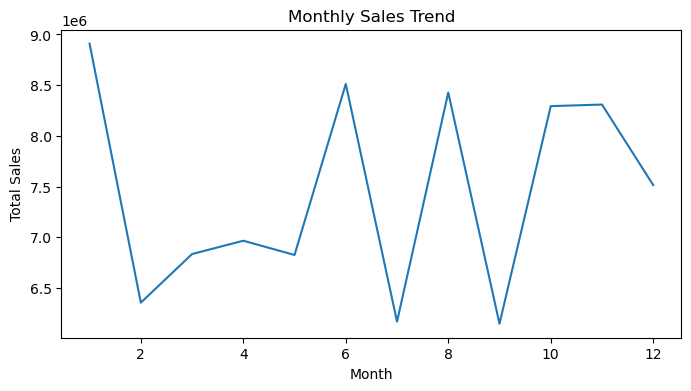

In [34]:
# visuals
plt.figure(figsize=(8,4))
plt.plot(sales_month.index, sales_month.values)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.show()


# sales by Category

In [35]:
# Grouping
sales_cat = df.groupby('Category')['TotalAmount'].sum()
sales_cat


Category
Accessories    16576699.93
Electronics    42444679.88
Fashion        30235356.19
Name: TotalAmount, dtype: float64

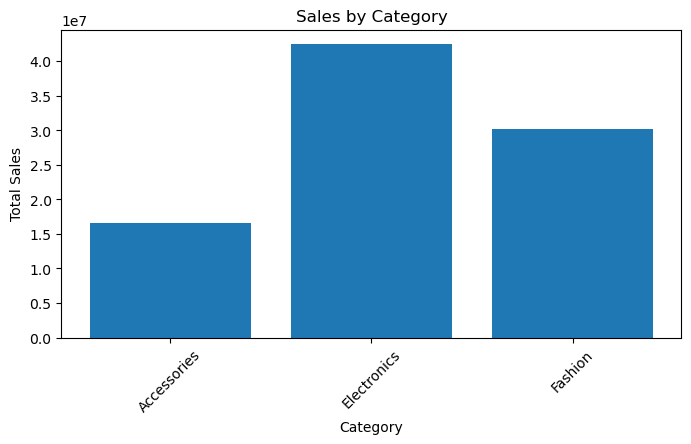

In [36]:
# Bar Chart
plt.figure(figsize=(8,4))
plt.bar(sales_cat.index, sales_cat.values)
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Sales by Category")
plt.xticks(rotation=45)
plt.show()


# top selling product

In [37]:
# group
top_products = df.groupby('Product')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_products


Product
Jeans         11031700.02
Shoes          9763517.98
Camera         9563442.81
Shirt          9440138.19
Watch          8693771.48
Tablet         8641358.44
Headphones     8391868.69
Laptop         8287770.17
Backpack       7882928.45
Mobile         7560239.77
Name: TotalAmount, dtype: float64

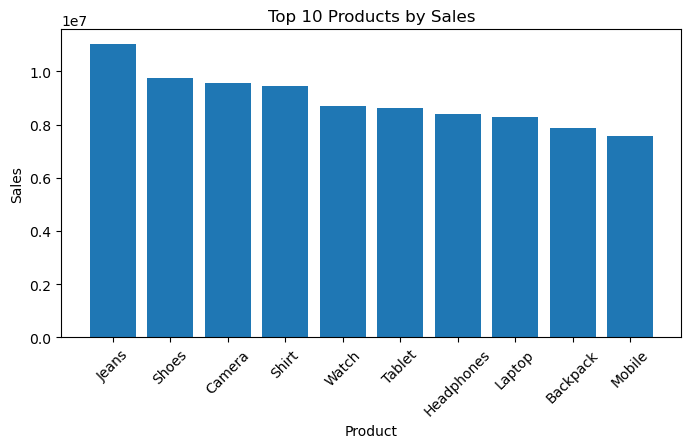

In [38]:
# plot
plt.figure(figsize=(8,4))
plt.bar(top_products.index, top_products.values)
plt.xticks(rotation=45)
plt.xlabel("Product")
plt.ylabel("Sales")
plt.title("Top 10 Products by Sales")
plt.show()


# orders by payment mode 

In [39]:
# group
payment_counts = df['PaymentMethod'].value_counts()
payment_counts


PaymentMethod
Credit Card    271
UPI            237
Net Banking    236
Debit Card     229
COD            227
Name: count, dtype: int64

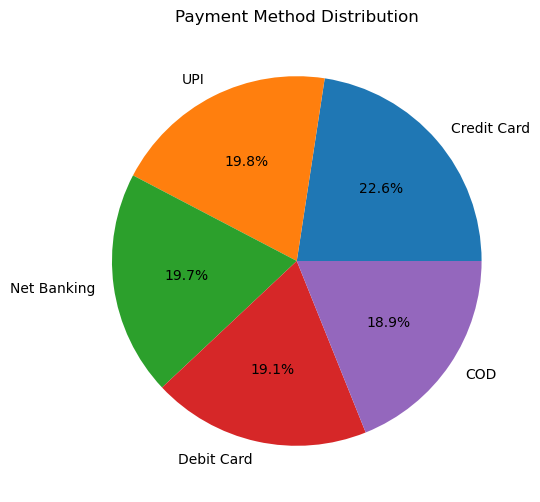

In [40]:
# pie chart

plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%")
plt.title("Payment Method Distribution")
plt.show()


# City-wise sales

In [41]:
# group
city_sales = df.groupby('City')['TotalAmount'].sum().sort_values(ascending=False)
city_sales


City
Hyderabad    14167376.79
Delhi        14138493.25
Kolkata      13353021.09
Chennai      12684761.07
Mumbai       11939676.81
Pune         11791613.76
Bangalore    11181793.23
Name: TotalAmount, dtype: float64

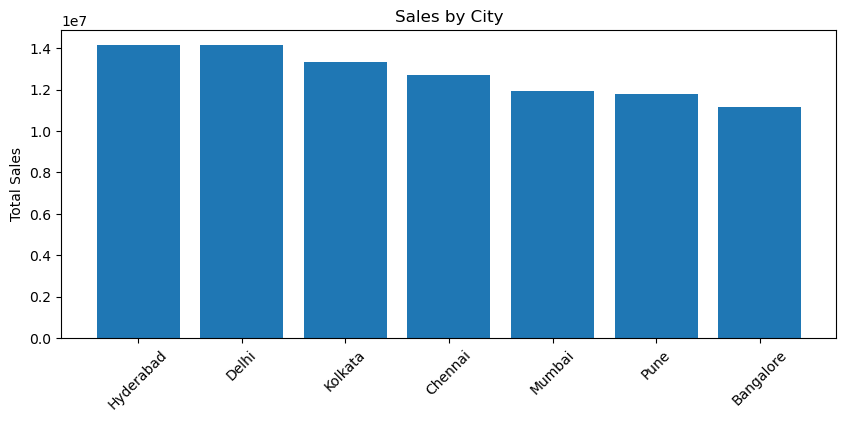

In [42]:
# bar chart
plt.figure(figsize=(10,4))
plt.bar(city_sales.index, city_sales.values)
plt.xticks(rotation=45)
plt.title("Sales by City")
plt.ylabel("Total Sales")
plt.show()


# customer rating Distribution

In [43]:
# count 
rating_counts = df['CustomerRating'].value_counts().sort_index()
rating_counts


CustomerRating
1    274
2    248
3    225
4    228
5    225
Name: count, dtype: int64

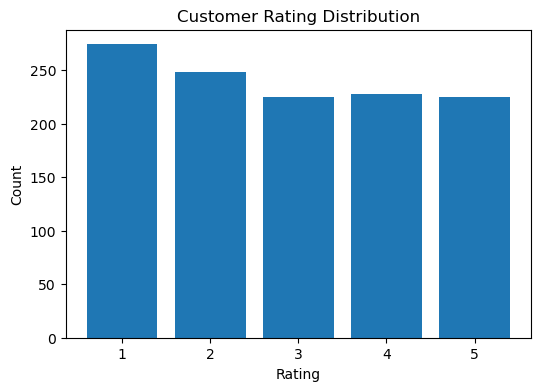

In [44]:
# plot
plt.figure(figsize=(6,4))
plt.bar(rating_counts.index, rating_counts.values)
plt.title("Customer Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


# CUSTOMER SEGMENTATION + RFM ANALYSIS
# RFM = Recency, Frequency, Monetary

In [45]:
# Import & Load Clean Dataset

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Sakshi\Downloads\ecommerce_sales_cleaned.csv")
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.head()


,OrderID,CustomerID,OrderDate,Product,Quantity,UnitPrice,PaymentMethod,City,State,Category,TotalAmount,DeliveryTime,CustomerRating,Year,Month,Day,Weekday,Profit
0,10001,5103,2023-02-17,Shoes,1,52796.66,Debit Card,Chennai,Tamil Nadu,Fashion,52796.66,3,3,2023,2,17,Friday,15839.00
1,10002,5436,2023-03-02,Laptop,1,48584.76,Net Banking,Bangalore,Karnataka,Electronics,48584.76,2,2,2023,3,2,Thursday,14575.43
2,10003,5861,2023-12-03,Laptop,3,40726.00,Net Banking,Chennai,Tamil Nadu,Electronics,122178.00,7,1,2023,12,3,Sunday,36653.40
3,10004,5271,2023-01-26,Headphones,4,37614.24,COD,Delhi,Delhi,Electronics,150456.96,9,4,2023,1,26,Thursday,45137.09
4,10005,5107,2023-10-19,Jeans,3,19198.02,UPI,Hyderabad,Telangana,Fashion,57594.06,6,5,2023,10,19,Thursday,17278.22


In [46]:
# RFM preparation
max_date = df['OrderDate'].max()
max_date


Timestamp('2023-12-31 00:00:00')

In [47]:
# Calculate R, F, M for each customer
# RFM calculation
rfm = df.groupby('CustomerID').agg({
    'OrderDate': lambda x: (max_date - x.max()).days,   # Recency
    'OrderID': 'count',                                 # Frequency
    'TotalAmount': 'sum'                                # Monetary
}).reset_index()


In [48]:
# rename column
rfm.rename(columns={
    'OrderDate': 'Recency',
    'OrderID': 'Frequency',
    'TotalAmount': 'Monetary'
}, inplace=True)

rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,5001,269,2,55332.99
1,5002,46,3,107731.59
2,5005,214,4,285046.60
3,5008,132,1,56910.62
4,5009,203,2,152986.50


In [50]:
# Create R,F,M scores
# Recency score (lower recency = better)
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])


In [51]:
# Frequency score (higher = better)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1,2,3,4])      


In [52]:
# Monetary score (higher = better)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])


In [53]:
# Customer Segmentation Rules
def segment_customer(row):
    r = int(row['R_score'])
    f = int(row['F_score'])
    m = int(row['M_score'])
    
    if r == 4 and f == 4 and m == 4:
        return 'Champion'
    elif r >= 3 and f >= 3:
        return 'Loyal Customer'
    elif r >= 3 and f <= 2:
        return 'Potential Loyalist'
    elif r == 2 and f >= 2:
        return 'Need Attention'
    elif r == 1 and f >= 3:
        return 'About to Lose'
    else:
        return 'At Risk'


In [54]:
rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,Segment
0,5001,269,2,55332.99,1,2,2,At Risk
1,5002,46,3,107731.59,4,4,3,Loyal Customer
2,5005,214,4,285046.60,2,4,4,Need Attention
3,5008,132,1,56910.62,2,1,2,At Risk
4,5009,203,2,152986.50,2,2,3,Need Attention


In [55]:
# Count Customers in Each Segment
segment_counts = rfm['Segment'].value_counts()
segment_counts


Segment
At Risk               182
Loyal Customer        178
Potential Loyalist    121
Need Attention        119
Champion               42
About to Lose          39
Name: count, dtype: int64

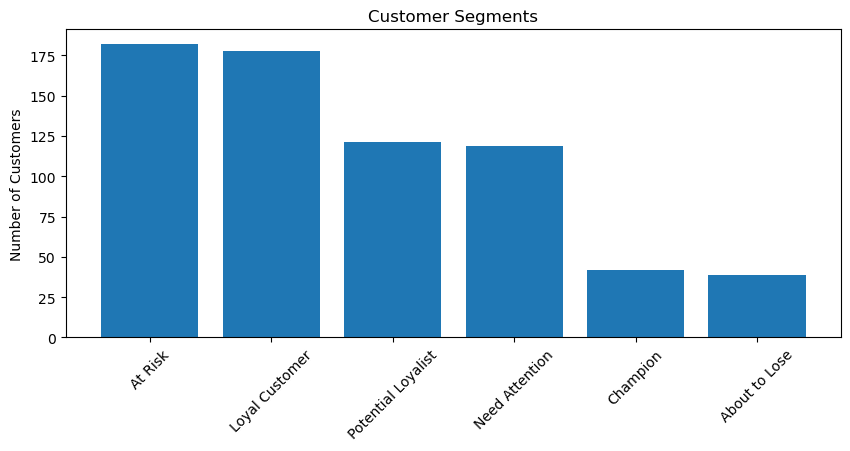

In [56]:
# visualization
plt.figure(figsize=(10,4))
plt.bar(segment_counts.index, segment_counts.values)
plt.xticks(rotation=45)
plt.title("Customer Segments")
plt.ylabel("Number of Customers")
plt.show()


In [57]:
rfm.to_csv(r"C:\Users\Sakshi\Downloads\customer_rfm_scores.csv", index=False)


# Customer Segmentation (RFM Analysis + Customer Insights)

In [59]:
# Load the cleaned dataset
import pandas as pd

df = pd.read_csv(r"C:\Users\Sakshi\Downloads\ecommerce_sales_cleaned.csv")

df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.head()


,OrderID,CustomerID,OrderDate,Product,Quantity,UnitPrice,PaymentMethod,City,State,Category,TotalAmount,DeliveryTime,CustomerRating,Year,Month,Day,Weekday,Profit
0,10001,5103,2023-02-17,Shoes,1,52796.66,Debit Card,Chennai,Tamil Nadu,Fashion,52796.66,3,3,2023,2,17,Friday,15839.00
1,10002,5436,2023-03-02,Laptop,1,48584.76,Net Banking,Bangalore,Karnataka,Electronics,48584.76,2,2,2023,3,2,Thursday,14575.43
2,10003,5861,2023-12-03,Laptop,3,40726.00,Net Banking,Chennai,Tamil Nadu,Electronics,122178.00,7,1,2023,12,3,Sunday,36653.40
3,10004,5271,2023-01-26,Headphones,4,37614.24,COD,Delhi,Delhi,Electronics,150456.96,9,4,2023,1,26,Thursday,45137.09
4,10005,5107,2023-10-19,Jeans,3,19198.02,UPI,Hyderabad,Telangana,Fashion,57594.06,6,5,2023,10,19,Thursday,17278.22


In [60]:
# create RFM metrics
# define today's date 
import datetime as dt

max_date = df['OrderDate'].max()
today_date = max_date + dt.timedelta(days=1)
today_date


Timestamp('2024-01-01 00:00:00')

In [61]:
# create RFM table
RFM = df.groupby('CustomerID').agg({
    'OrderDate': lambda x: (today_date - x.max()).days,
    'OrderID': 'count',
    'TotalAmount': 'sum'
}).reset_index()

RFM.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
RFM.head()


,CustomerID,Recency,Frequency,Monetary
0,5001,270,2,55332.99
1,5002,47,3,107731.59
2,5005,215,4,285046.60
3,5008,133,1,56910.62
4,5009,204,2,152986.50


In [62]:
# score RFM values
RFM['R_score'] = pd.qcut(RFM['Recency'], 5, labels=[5,4,3,2,1])
RFM['F_score'] = pd.qcut(RFM['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5])
RFM['M_score'] = pd.qcut(RFM['Monetary'], 5, labels=[1,2,3,4,5])


In [63]:
# create RFM segment
RFM['RFM_Segment'] = (
    RFM['R_score'].astype(str) +
    RFM['F_score'].astype(str) +
    RFM['M_score'].astype(str)
)


In [64]:
# Create RFM score(sum)
RFM['RFM_Score'] = (
    RFM['R_score'].astype(int) +
    RFM['F_score'].astype(int) +
    RFM['M_score'].astype(int)
)


In [65]:
# define customer Groups
def rfm_group(score):
    if score >= 12:
        return "Premium / Best Customers"
    elif score >= 9:
        return "Loyal Customers"
    elif score >= 6:
        return "Potential Customers"
    else:
        return "At Risk / Low Value"

RFM['CustomerGroup'] = RFM['RFM_Score'].apply(rfm_group)


In [66]:
RFM['CustomerGroup'].value_counts()


CustomerGroup
Loyal Customers             201
Potential Customers         183
Premium / Best Customers    175
At Risk / Low Value         122
Name: count, dtype: int64

# Visualize Customer Segments

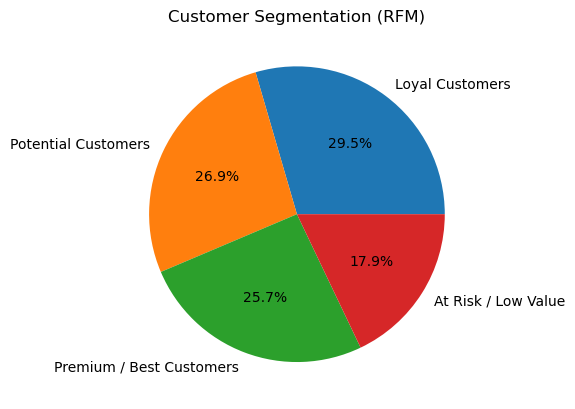

In [67]:
# pie chart 
import matplotlib.pyplot as plt

RFM['CustomerGroup'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Customer Segmentation (RFM)")
plt.ylabel("")
plt.show()


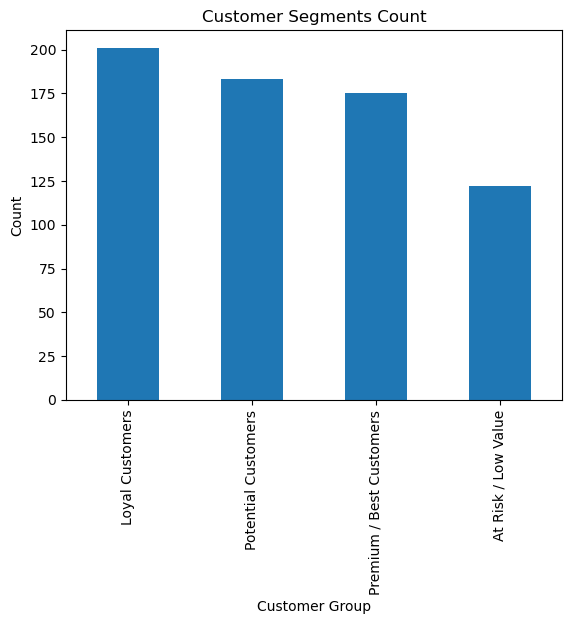

In [68]:
# bar chart
RFM['CustomerGroup'].value_counts().plot(kind='bar')
plt.title("Customer Segments Count")
plt.xlabel("Customer Group")
plt.ylabel("Count")
plt.show()


In [70]:
# Merge RFM segments back to main dataset (for Day-5 dashboard)
df = df.merge(RFM[['CustomerID', 'CustomerGroup']], on='CustomerID', how='left')
df.to_csv(r"C:\Users\Sakshi\Downloads\ecommerce_day4_segmented.csv", index=False)

